In [23]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando dados dos times da API da NBA
from nba_api.stats.endpoints import TeamInfoCommon
from nba_api.stats.static import teams

# Obter a lista de times da NBA
nba_teams = teams.get_teams()

# Criar um dicionário com os IDs dos times
team_ids_dict = {team['full_name']: team['id'] for team in nba_teams}

# Criar um DataFrame vazio para armazenar os dados
df = pd.DataFrame()

# Percorrer os times e adicionar os dados ao DataFrame
for team_name, team_id in team_ids_dict.items():
    team_info = TeamInfoCommon(team_id=team_id)  # Obter informações sobre o time
    df_team = team_info.get_data_frames()[0]  # Selecionar o primeiro DataFrame retornado
    df_team['TeamName'] = team_name  # Adicionar o nome do time ao DataFrame
    df_team['Season'] = '2024-25'  # Adicionar a temporada ao DataFrame
    df = pd.concat([df, df_team], ignore_index=True)  # Concatenar ao DataFrame principal

# Exibir o DataFrame combinado
df


,TEAM_ID,SEASON_YEAR,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CONFERENCE,TEAM_DIVISION,TEAM_CODE,TEAM_SLUG,W,L,PCT,CONF_RANK,DIV_RANK,MIN_YEAR,MAX_YEAR,TeamName,Season
0,1610612737,2024-25,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,36,38,0.486,7,1,1949,2024,Atlanta Hawks,2024-25
1,1610612738,2024-25,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,55,19,0.743,2,1,1946,2024,Boston Celtics,2024-25
2,1610612739,2024-25,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,60,15,0.800,1,1,1970,2024,Cleveland Cavaliers,2024-25
3,1610612740,2024-25,New Orleans,Pelicans,NOP,West,Southwest,pelicans,pelicans,21,54,0.280,14,5,2002,2024,New Orleans Pelicans,2024-25
4,1610612741,2024-25,Chicago,Bulls,CHI,East,Central,bulls,bulls,33,41,0.446,9,5,1966,2024,Chicago Bulls,2024-25
5,1610612742,2024-25,Dallas,Mavericks,DAL,West,Southwest,mavericks,mavericks,37,38,0.493,9,3,1980,2024,Dallas Mavericks,2024-25
6,1610612743,2024-25,Denver,Nuggets,DEN,West,Northwest,nuggets,nuggets,47,28,0.627,3,2,1976,2024,Denver Nuggets,2024-25
7,1610612744,2024-25,Golden State,Warriors,GSW,West,Pacific,warriors,warriors,43,31,0.581,6,2,1946,2024,Golden State Warriors,2024-25
8,1610612745,2024-25,Houston,Rockets,HOU,West,Southwest,rockets,rockets,49,26,0.653,2,1,1967,2024,Houston Rockets,2024-25
9,1610612746,2024-25,LA,Clippers,LAC,West,Pacific,clippers,clippers,42,32,0.568,8,3,1970,2024,Los Angeles Clippers,2024-25


In [24]:
# Coletando da API informações sobre os jogadores da NBA
from nba_api.stats.static import players
player_dict = players.get_players()

In [25]:
# Coletando informações sobre o jogador
nj = [player for player in player_dict if player['full_name'] == 'Nikola Jokić'][0]
nj_id = nj['id']
nj

{'id': 203999,
 'full_name': 'Nikola Jokić',
 'first_name': 'Nikola',
 'last_name': 'Jokić',
 'is_active': True}

In [26]:
# Importando dados da API
from nba_api.stats.endpoints import playergamelog

# Coletando os dados do jogador via api
gamelog_jokic = playergamelog.PlayerGameLog(player_id='203999', season = '2024')
df_jokic_games_2024= gamelog_jokic.get_data_frames()

In [45]:
# Extraindo o DataFrame da lista
df_jokic_games_2024_df = df_jokic_games_2024[0]

# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_jokic = df_jokic_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_jokic.head(20))

        MATCHUP WL  MIN  FTM  FTA  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0   DEN vs. UTA  W   32   10   12    8   18   27   14    6          28
1   DEN vs. MIL  W   38    4    7   16   25   39   10   10          14
2   DEN vs. WAS  L   39    7    7   16   30   40   13    9           6
3   DEN vs. LAL  W   38   12   17    8   16   28    7    5           2
4   DEN vs. MIN  L   38    6    8   13   23   34    8    4         -24
5     DEN @ OKC  W   40    4    5   15   20   35   18    8           8
6     DEN @ OKC  L   41    2    6   10   23   24   13    9         -13
7   DEN vs. PHX  W   45    2    3   13   22   31   21   22           8
8   DEN vs. SAC  W   38    4    6    9   18   22   15    6          -7
9     DEN @ BOS  L   39    0    0    9   15   20   14    9           0
10    DEN @ DET  W   34   11   12    6   12   23   17   15          33
11    DEN @ MIL  L   38    5    7   13   16   32   14   10          -5
12    DEN @ IND  W   39    0    0    9   14   18    9   19          17
13  DE

In [46]:
# Exibindo a média das colunas selecionadas
average_stats_jokic = df_jokic[['MIN','FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_jokic)

MIN           36.5
FTM            5.0
FTA            6.3
FGM           11.2
FGA           19.4
PTS           29.2
REB           12.8
AST           10.2
PLUS_MINUS     8.5
dtype: float64


In [29]:
# Salvando o DataFrame em CSV
df_jokic.to_csv('jokic_games_2024.csv', index=False)

In [30]:
# Coletando informações sobre o jogador
jt = [player for player in player_dict if player['full_name'] == 'Jayson Tatum'][0]
jt_id = jt['id']
jt

{'id': 1628369,
 'full_name': 'Jayson Tatum',
 'first_name': 'Jayson',
 'last_name': 'Tatum',
 'is_active': True}

In [31]:
# Coletando os dados do jogador via api
gamelog_tatum = playergamelog.PlayerGameLog(player_id='1628369', season = '2024')
df_tatum_games_2024= gamelog_tatum.get_data_frames()

In [32]:
# Extraindo o DataFrame da lista
df_tatum_games_2024_df = df_tatum_games_2024[0]

# Exibindo o DataFrame
print(df_tatum_games_2024_df.head(20))

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22024    1628369  0022401080  MAR 29, 2025    BOS @ SAS  W   36   10   
1      22024    1628369  0022401044  MAR 24, 2025    BOS @ SAC  W   26    8   
2      22024    1628369  0022401034  MAR 23, 2025    BOS @ POR  W   37   11   
3      22024    1628369  0022401020  MAR 21, 2025    BOS @ UTA  W   33   11   
4      22024    1628369  0022400968  MAR 15, 2025    BOS @ BKN  W   36    8   
5      22024    1628369  0022400958  MAR 14, 2025    BOS @ MIA  W   37    8   
6      22024    1628369  0022400946  MAR 12, 2025  BOS vs. OKC  L   41   12   
7      22024    1628369  0022400918  MAR 08, 2025  BOS vs. LAL  W   45   12   
8      22024    1628369  0022400900  MAR 06, 2025  BOS vs. PHI  W   31   14   
9      22024    1628369  0022400866  MAR 02, 2025  BOS vs. DEN  W   38    4   
10     22024    1628369  0022400852  FEB 28, 2025  BOS vs. CLE  L   41   19   
11     22024    1628369  0022400836  FEB 26, 2025   

In [47]:
# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_tatum = df_tatum_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_tatum.head(20))

        MATCHUP WL  MIN  FTM  FTA  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0     BOS @ SAS  W   36    7    7   10   22   29   10    8           9
1     BOS @ SAC  W   26    4    8    8   15   25    7    8          13
2     BOS @ POR  W   37    7    7   11   24   30    9    9          16
3     BOS @ UTA  W   33    1    1   11   25   26    6    6          18
4     BOS @ BKN  W   36    3    3    8   19   20    8    8         -15
5     BOS @ MIA  W   37    7    7    8   21   28    4    5          10
6   BOS vs. OKC  L   41    5    5   12   23   33    8    8           4
7   BOS vs. LAL  W   45   10   12   12   28   40   12    8          12
8   BOS vs. PHI  W   31    2    2   14   23   35    7    2          19
9   BOS vs. DEN  W   38    7    8    4   15   16   11    7          -2
10  BOS vs. CLE  L   41    4    5   19   37   46   16    9           5
11    BOS @ DET  L   33    3    4   10   19   27    6    3         -11
12    BOS @ TOR  W   40    2    2    7   18   19    6   11          20
13  BO

In [48]:
# Exibindo a média das colunas selecionadas
average_stats_tatum = df_tatum[['MATCHUP', 'WL', 'MIN', 'FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_tatum)

MIN           36.4
FTM            5.0
FTA            6.2
FGM            9.3
FGA           20.4
PTS           27.2
REB            8.7
AST            6.0
PLUS_MINUS     7.4
dtype: float64


In [35]:
# Salvando o DataFrame em CSV
df_tatum.to_csv('tatum_games_2024.csv', index=False)

In [36]:
# Coletando informações sobre o jogador
ga = [player for player in player_dict if player['full_name'] == 'Giannis Antetokounmpo'][0]
ga_id = ga['id']
ga

{'id': 203507,
 'full_name': 'Giannis Antetokounmpo',
 'first_name': 'Giannis',
 'last_name': 'Antetokounmpo',
 'is_active': True}

In [37]:
# Coletando os dados do jogador via api
gamelog_antetokounmpo = playergamelog.PlayerGameLog(player_id='203507', season = '2024')
df_antetokounmpo_games_2024= gamelog_antetokounmpo.get_data_frames()

In [38]:
# Extraindo o DataFrame da lista
df_antetokounmpo_games_2024_df = df_antetokounmpo_games_2024[0]

# Exibindo o DataFrame
print(df_antetokounmpo_games_2024_df.head(20))

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22024     203507  0022401083  MAR 30, 2025  MIL vs. ATL  L   30   11   
1      22024     203507  0022401070  MAR 28, 2025  MIL vs. NYK  L   35   11   
2      22024     203507  0022401043  MAR 24, 2025    MIL @ PHX  L   37   12   
3      22024     203507  0022401027  MAR 22, 2025    MIL @ SAC  W   35   12   
4      22024     203507  0022400996  MAR 20, 2025    MIL @ LAL  W   29    9   
5      22024     203507  0022401012  MAR 18, 2025    MIL @ GSW  L   39    5   
6      22024     203507  0022400982  MAR 16, 2025  MIL vs. OKC  L   36    7   
7      22024     203507  0022400972  MAR 15, 2025  MIL vs. IND  W   35   14   
8      22024     203507  0022400955  MAR 13, 2025  MIL vs. LAL  W   30    8   
9      22024     203507  0022400942  MAR 11, 2025    MIL @ IND  L   34    9   
10     22024     203507  0022400922  MAR 09, 2025  MIL vs. CLE  L   34   13   
11     22024     203507  0022400917  MAR 08, 2025  M

In [49]:
# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_antetokounmpo = df_antetokounmpo_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_antetokounmpo.head(20))

        MATCHUP WL  MIN  FTM  FTA  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0   MIL vs. ATL  L   30    9   14   11   18   31    9    5         -18
1   MIL vs. NYK  L   35    8   11   11   17   30    9    7          -6
2     MIL @ PHX  L   37    6   13   12   19   31   10    5          -4
3     MIL @ SAC  W   35    8   13   12   20   32   17    3          -6
4     MIL @ LAL  W   29   10   12    9   15   28    7    4          19
5     MIL @ GSW  L   39   10   15    5   16   20    9    7          -7
6   MIL vs. OKC  L   36    7   12    7   15   21   12   10         -13
7   MIL vs. IND  W   35    6    6   14   19   34   10    7           2
8   MIL vs. LAL  W   30    8   13    8   17   24   12    9          22
9     MIL @ IND  L   34    1    3    9   14   19   17    7          10
10  MIL vs. CLE  L   34    4    8   13   24   30    9    3         -13
11  MIL vs. ORL  L   35    7   11   15   23   37   11    4           2
12  MIL vs. DAL  W   25    6    6   13   20   32   15    4          30
13    

In [50]:
# Exibindo a média das colunas selecionadas
average_stats_antetokounmpo = df_antetokounmpo[['MATCHUP', 'WL', 'MIN', 'FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_antetokounmpo)

MIN           34.0
FTM            6.3
FTA           10.5
FGM           11.9
FGA           19.8
PTS           30.2
REB           11.9
AST            5.9
PLUS_MINUS     3.6
dtype: float64


In [51]:
# Salvando o DataFrame em CSV
df_antetokounmpo.to_csv('antetokounmpo_games_2024.csv', index=False)

In [55]:
# Coletando informações sobre o jogador
shai = [player for player in player_dict if player['full_name'] == 'Shai Gilgeous-Alexander'][0]
shai_id = shai['id']
shai

{'id': 1628983,
 'full_name': 'Shai Gilgeous-Alexander',
 'first_name': 'Shai',
 'last_name': 'Gilgeous-Alexander',
 'is_active': True}

In [58]:
# Coletando os dados do jogador via api
gamelog_shai = playergamelog.PlayerGameLog(player_id='1628983', season = '2024')
df_shai_games_2024= gamelog_shai.get_data_frames()

In [59]:
# Extraindo o DataFrame da lista
df_shai_games_2024_df = df_shai_games_2024[0]

# Exibindo o DataFrame
print(df_shai_games_2024_df.head(20))

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22024    1628983  0022401079  MAR 29, 2025  OKC vs. IND  W   31   10   
1      22024    1628983  0022401064  MAR 27, 2025  OKC vs. MEM  W   34   15   
2      22024    1628983  0022401052  MAR 25, 2025    OKC @ SAC  W   33   10   
3      22024    1628983  0022401036  MAR 23, 2025    OKC @ LAC  W   37    7   
4      22024    1628983  0022401017  MAR 21, 2025  OKC vs. CHA  W   30   13   
5      22024    1628983  0022400982  MAR 16, 2025    OKC @ MIL  W   34   11   
6      22024    1628983  0022400969  MAR 15, 2025    OKC @ DET  W   38   17   
7      22024    1628983  0022400946  MAR 12, 2025    OKC @ BOS  W   39   11   
8      22024    1628983  0022400936  MAR 10, 2025  OKC vs. DEN  L   36    8   
9      22024    1628983  0022400920  MAR 09, 2025  OKC vs. DEN  W   35   15   
10     22024    1628983  0022400895  MAR 05, 2025    OKC @ MEM  W   35   14   
11     22024    1628983  0022400879  MAR 03, 2025  O

In [60]:
# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_shai = df_shai_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_shai.head(20))

        MATCHUP WL  MIN  FTM  FTA  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0   OKC vs. IND  W   31   10   12   10   23   33    7    8          17
1   OKC vs. MEM  W   34    7    9   15   25   37    3    6          26
2     OKC @ SAC  W   33    9   10   10   23   32    8    5          13
3     OKC @ LAC  W   37   11   11    7   29   26    3    8           0
4   OKC vs. CHA  W   30    2    2   13   18   30    6    9          31
5     OKC @ MIL  W   34    9   11   11   27   31    2    8           8
6     OKC @ DET  W   38   10   10   17   26   48    4    6          18
7     OKC @ BOS  W   39   10   11   11   20   34    5    7           3
8   OKC vs. DEN  L   36    6    6    8   14   25    3    7         -18
9   OKC vs. DEN  W   35    8    8   15   32   40    8    5          11
10    OKC @ MEM  W   35   10   10   14   25   41    2    8          19
11  OKC vs. HOU  W   36   10   10   18   30   51    5    7           6
12    OKC @ SAS  W   32    8    9   10   19   31    4    8          15
13    

In [61]:
# Exibindo a média das colunas selecionadas
average_stats_shai = df_shai[['MATCHUP', 'WL', 'MIN', 'FTM','FTA', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_shai)

MIN           34.3
FTM            8.1
FTA            9.0
FGM           11.3
FGA           21.8
PTS           32.9
REB            5.1
AST            6.3
PLUS_MINUS    12.4
dtype: float64


In [62]:
# Salvando o DataFrame em CSV
df_shai.to_csv('shai_games_2024.csv', index=False)

In [52]:
# Contando vitórias e derrotas para Jokić
wl_count_jokic = df_jokic['WL'].value_counts()

# Contando vitórias e derrotas para Tatum
wl_count_tatum = df_tatum['WL'].value_counts()

# Contando vitórias e derrotas para Antetokounmpo
wl_count_antetokounmpo = df_antetokounmpo['WL'].value_counts()

# Contando vitórias e derrotas para Shai
wl_count_shai = df_shai['WL'].value_counts()

In [64]:
# Contando vitórias e derrotas para cada jogador
wl_count_jokic = df_jokic['WL'].value_counts()
wl_count_tatum = df_tatum['WL'].value_counts()
wl_count_shai = df_shai['WL'].value_counts()
wl_count_antetokounmpo = df_antetokounmpo['WL'].value_counts()

# Calculando as estatísticas médias para cada jogador
average_stats_jokic = df_jokic.mean(numeric_only=True).round(1)
average_stats_tatum = df_tatum.mean(numeric_only=True).round(1)
average_stats_shai = df_shai.mean(numeric_only=True).round(1)
average_stats_antetokounmpo = df_antetokounmpo.mean(numeric_only=True).round(1)

# Criando DataFrame de comparação das estatísticas médias
comparison = pd.DataFrame({
    "Stat": average_stats_jokic.index,
    "Jokic Average": average_stats_jokic.values,
    "Tatum Average": average_stats_tatum.values,
    "Shai Average": average_stats_shai.values,
    "Antetokounmpo Average": average_stats_antetokounmpo.values
})

# Adicionando contagem de vitórias e derrotas ao DataFrame
wins_losses_data = pd.DataFrame({
    "Stat": ["Wins", "Losses"],
    "Jokic Average": [wl_count_jokic.get('W', 0), wl_count_jokic.get('L', 0)],
    "Tatum Average": [wl_count_tatum.get('W', 0), wl_count_tatum.get('L', 0)],
    "Shai Average": [wl_count_shai.get('W', 0), wl_count_shai.get('L', 0)],
    "Antetokounmpo Average": [wl_count_antetokounmpo.get('W', 0), wl_count_antetokounmpo.get('L', 0)]
})

# Concatenando os dois DataFrames
comparison = pd.concat([comparison, wins_losses_data], ignore_index=True)

# Exibindo a comparação
print(comparison)

          Stat  Jokic Average  Tatum Average  Shai Average  \
0          MIN           36.5           36.4          34.3   
1          FTM            5.0            5.0           8.1   
2          FTA            6.3            6.2           9.0   
3          FGM           11.2            9.3          11.3   
4          FGA           19.4           20.4          21.8   
5          PTS           29.2           27.2          32.9   
6          REB           12.8            8.7           5.1   
7          AST           10.2            6.0           6.3   
8   PLUS_MINUS            8.5            7.4          12.4   
9         Wins           43.0           49.0          60.0   
10      Losses           21.0           18.0          11.0   

    Antetokounmpo Average  
0                    34.0  
1                     6.3  
2                    10.5  
3                    11.9  
4                    19.8  
5                    30.2  
6                    11.9  
7                     5.9  
8  

          Stat  Jokic  Tatum  Shai  Antetokounmpo
0          MIN   36.5   36.4  34.3           34.0
1          FTM    5.0    5.0   8.1            6.3
2          FTA    6.3    6.2   9.0           10.5
3          FGM   11.2    9.3  11.3           11.9
4          FGA   19.4   20.4  21.8           19.8
5          PTS   29.2   27.2  32.9           30.2
6          REB   12.8    8.7   5.1           11.9
7          AST   10.2    6.0   6.3            5.9
8   PLUS_MINUS    8.5    7.4  12.4            3.6
9         Wins   43.0   49.0  60.0           34.0
10      Losses   21.0   18.0  11.0           27.0


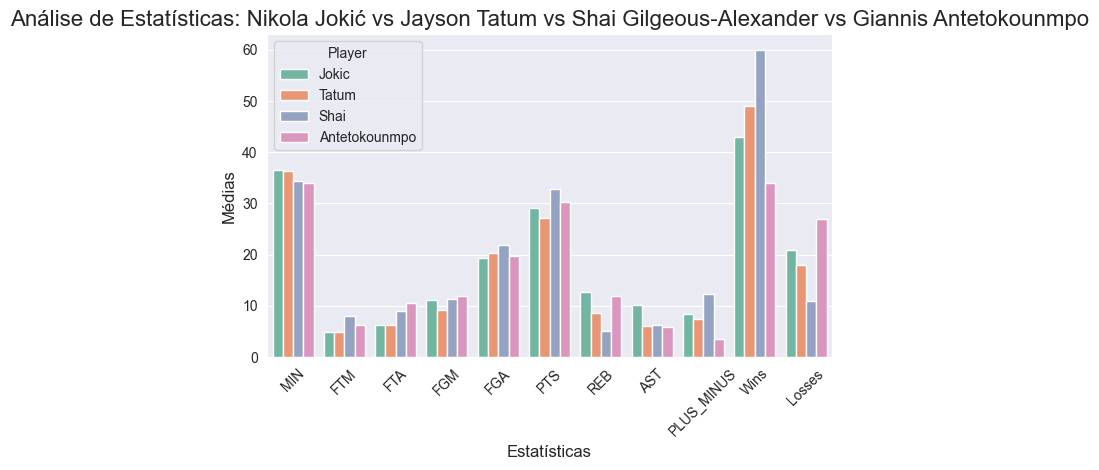

In [65]:
# Contando vitórias e derrotas para cada jogador
wl_count_jokic = df_jokic['WL'].value_counts()
wl_count_tatum = df_tatum['WL'].value_counts()
wl_count_shai = df_shai['WL'].value_counts()
wl_count_antetokounmpo = df_antetokounmpo['WL'].value_counts()

# Calculando as estatísticas médias para cada jogador
average_stats_jokic = df_jokic.mean(numeric_only=True).round(1)
average_stats_tatum = df_tatum.mean(numeric_only=True).round(1)
average_stats_shai = df_shai.mean(numeric_only=True).round(1)
average_stats_antetokounmpo = df_antetokounmpo.mean(numeric_only=True).round(1)

# Criando DataFrame de comparação das estatísticas médias
comparison = pd.DataFrame({
    "Stat": average_stats_jokic.index,
    "Jokic": average_stats_jokic.values,
    "Tatum": average_stats_tatum.values,
    "Shai": average_stats_shai.values,
    "Antetokounmpo": average_stats_antetokounmpo.values
})

# Adicionando contagem de vitórias e derrotas ao DataFrame
wins_losses_data = pd.DataFrame({
    "Stat": ["Wins", "Losses"],
    "Jokic": [wl_count_jokic.get('W', 0), wl_count_jokic.get('L', 0)],
    "Tatum": [wl_count_tatum.get('W', 0), wl_count_tatum.get('L', 0)],
    "Shai": [wl_count_shai.get('W', 0), wl_count_shai.get('L', 0)],
    "Antetokounmpo": [wl_count_antetokounmpo.get('W', 0), wl_count_antetokounmpo.get('L', 0)]
})

# Concatenando os dois DataFrames
comparison = pd.concat([comparison, wins_losses_data], ignore_index=True)

# Exibindo a comparação
print(comparison)

# Transformando o DataFrame para formato longo (long format)
comparison_long = comparison.melt(id_vars="Stat", var_name="Player", value_name="Average")

# Gerando o gráfico de barras
sns.barplot(
    data=comparison_long,
    x="Stat",
    y="Average",
    hue="Player",
    palette=sns.color_palette("Set2", 4)
)

# Adicionando título e rótulos
plt.title("Análise de Estatísticas: Nikola Jokić vs Jayson Tatum vs Shai Gilgeous-Alexander vs Giannis Antetokounmpo", fontsize=16)
plt.ylabel("Médias", fontsize=12)
plt.xlabel("Estatísticas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Player")
plt.tight_layout()

# Exibindo o gráfico
plt.show()



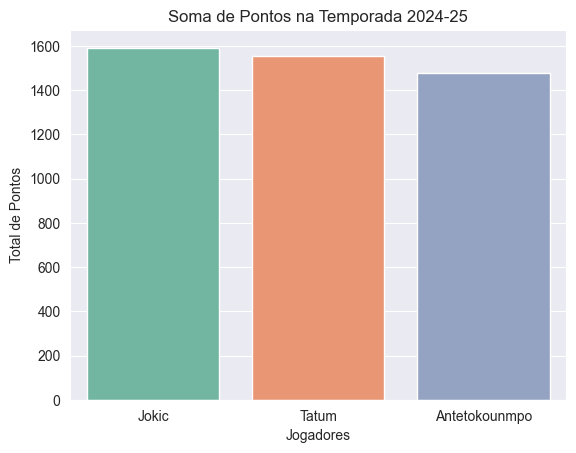

In [50]:
# Calcular o total de pontos de cada jogador
total_points_jokic = df_jokic['PTS'].sum()
total_points_tatum = df_tatum['PTS'].sum()
total_points_antetokounmpo = df_antetokounmpo['PTS'].sum()
players = ['Jokic', 'Tatum', 'Antetokounmpo']
total_points = [total_points_jokic, total_points_tatum, total_points_antetokounmpo]

# Plotar o gráfico de barras
sns.barplot(x=players, y=total_points, palette="Set2", hue=players, dodge=False, legend=False)
plt.title("Soma de Pontos na Temporada 2024-25")
plt.xlabel("Jogadores")
plt.ylabel("Total de Pontos")
plt.show()

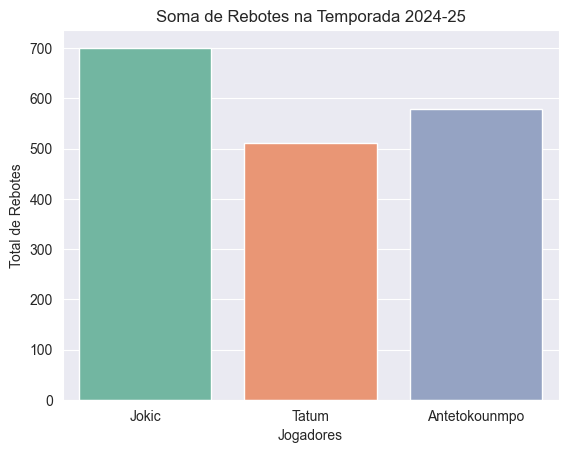

In [51]:
# Calcular o total de pontos de cada jogador
total_points_jokic = df_jokic['REB'].sum()
total_points_tatum = df_tatum['REB'].sum()
total_points_antetokounmpo = df_antetokounmpo['REB'].sum()
players = ['Jokic', 'Tatum', 'Antetokounmpo']
total_points = [total_points_jokic, total_points_tatum, total_points_antetokounmpo]

# Plotar o gráfico de barras
sns.barplot(x=players, y=total_points, palette="Set2", hue=players, dodge=False, legend=False)
plt.title("Soma de Rebotes na Temporada 2024-25")
plt.xlabel("Jogadores")
plt.ylabel("Total de Rebotes")
plt.show()

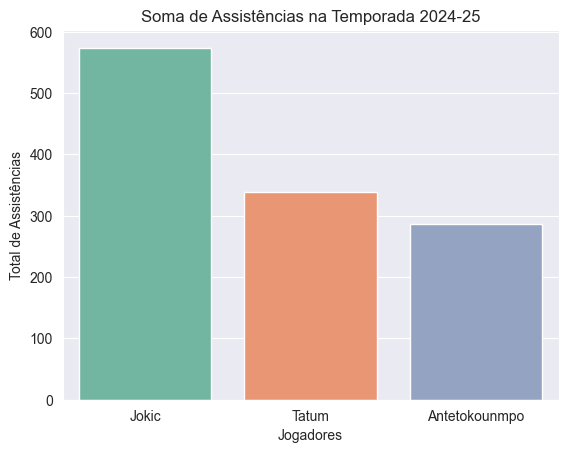

In [52]:
# Calcular o total de pontos de cada jogador
total_points_jokic = df_jokic['AST'].sum()
total_points_tatum = df_tatum['AST'].sum()
total_points_antetokounmpo = df_antetokounmpo['AST'].sum()
players = ['Jokic', 'Tatum', 'Antetokounmpo']
total_points = [total_points_jokic, total_points_tatum, total_points_antetokounmpo]

# Plotar o gráfico de barras
sns.barplot(x=players, y=total_points, palette="Set2", hue=players, dodge=False, legend=False)
plt.title("Soma de Assistências na Temporada 2024-25")
plt.xlabel("Jogadores")
plt.ylabel("Total de Assistências")
plt.show()